In [1]:
import nbsetup
from models.params import flat_points, large_points, large_z
from models.load import load_sparc
from models.sparc.result import Result
from models.sparc.tune import Tune
from models.sparc.mcmc import mcmc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
from references.sparc import rar_df
rdf = rar_df()

In [3]:
FILTER = 'Quality simulation'
xlabel = "predicted"

In [19]:
def plot_n_tune(k, nuissance=False):
    fig, axes = plt.subplots(2, 2, sharex=False, sharey=True, figsize=(8,8))
    namespace = '%s/%s_1' % (k, flat_points)
    namespace = '%s/%s_%s' % (k, large_points, large_z)
    #namespace = '%s/101_7' % k
    print(namespace)
    # standard
    r = Result(load_sparc(namespace=namespace))
    r.plot_rar(kind=0, title='Normal ratio', query_key=FILTER, label=xlabel, axis=axes[0][0])
    display(r.residual_stats())
    print(r.residual_stats().iloc[2]['rmse'])
    
    def indi(mode, axes):
        analysis = Tune(mcmc(r.datasets()[FILTER], mode))
        tuned = analysis.Result(fast=True, simulations=r.simulations)
        print(title)
        display(tuned.residual_stats())
        tuned.plot_rar(kind=0, title=mode, query_key=FILTER, label=xlabel, axis=axes)
        if 'kappa' in tuned.adjustments:
            print(tuned.adjustments[['kappa', 'nu']].mean())
        return tuned
    
    tuned = indi("kn", axes[0][1])
    indi("knyi", axes[1][0])
    indi("bky", axes[1][1])

    
def comparison(sizes=('121_15',), labels=('vector',), modes=('knyi', 'knyid'), normals=(True,)):
    
    data = []
    for mode in modes:
        for label in labels:
            for size in sizes:
                for norm in normals:
                    print(mode, label, size)
                    namespace = '%s/%s' % (label, size)
                    r = Result(load_sparc(namespace=namespace))
                    if mode:
                        analysis = Tune(mcmc(r.datasets()[FILTER], mode, normals=norm))
                        r = analysis.Result(fast=True, simulations=r.simulations)
                    this = {
                        'mode': mode,
                        'size': size,
                        'label': label,
                        'normals': norm,
                        'rmse': r.residual_stats().iloc[2]['rmse']
                    }
                    
                    if r.adjustments is not None:
                        for l in ('kappa', 'nu', 'upsilon','Inc','D'):
                            if l in r.adjustments:
                                this[l] = r.adjustments[l].mean()
                        ds = r.datasets()[FILTER]
                        for l in ('Ybul', 'Ydisk'):
                            if l in ds:
                                this[l] = ds[l].mean()
                                this[l+'_std'] = ds[l].std()
                    
                    data.append(this)
                    print(this)
    
    df = pd.DataFrame(data)
    nbsetup.cp('')
    display(df)
    return df
        

In [12]:
for x in ('Ybul', 'Ydisk'):
    print(x, rdf[x].mean(), rdf[x].std())


Ybul 0.1341142857142857 0.36782552799883134
Ydisk 0.6377714285714287 0.4830365568680449


In [15]:
logs = comparison(sizes=(('91_51'), ('91_19'), ('91_9'), ('71_9')), labels=('standard',))

,mode,size,label,normals,rmse,kappa,nu,Ybul,Ybul_std,Ydisk,Ydisk_std
0,knyi,101_19,standard,True,0.144187,2571.948512,0.330420,0.107358,0.317504,0.480396,0.414493
1,knyi,91_19,standard,True,0.137436,2174.278063,0.325140,0.102519,0.312582,0.462588,0.417448
2,knyi,91_9,standard,True,0.140289,3130.936507,0.338121,0.102737,0.314407,0.433162,0.408443
3,knyi,71_9,standard,True,0.136419,3787.724501,0.347490,0.100939,0.315251,0.394657,0.414377
4,knyid,101_19,standard,True,0.096006,130.180388,0.217413,0.125642,0.315174,0.557365,0.460445
5,knyid,91_19,standard,True,0.096459,155.227340,0.225935,0.124390,0.313563,0.552590,0.466166
6,knyid,91_9,standard,True,0.092531,376.385053,0.266881,0.140420,0.338604,0.618201,0.465871
7,knyid,71_9,standard,True,0.086960,999.515969,0.313950,0.165996,0.358118,0.642010,0.439840


In [16]:
logs = comparison(sizes=(('91_51'),), labels=('vector',))

,mode,size,label,normals,rmse,kappa,nu,Ybul,Ybul_std,Ydisk,Ydisk_std
0,knyi,91_51,vector,True,0.088620,1192.877673,0.292180,0.299310,0.525747,0.573021,0.458061
1,knyid,91_51,vector,True,0.063673,10.780402,0.100597,0.281236,0.515195,0.593070,0.471880


In [20]:
#61, 65, 75, 81
logs = comparison(sizes=('61_11', '65_11','75_11','81_11'), labels=('vector','standard'))

,mode,size,label,normals,rmse,kappa,nu,Inc,Ybul,Ybul_std,Ydisk,Ydisk_std,D
0,knyi,61_11,vector,True,0.095400,95.521577,0.180887,60.978116,0.316431,0.540152,0.531540,0.406685,NaN
1,knyi,65_11,vector,True,0.090826,436.375311,0.249804,61.071822,0.318481,0.541200,0.593949,0.432082,NaN
2,knyi,75_11,vector,True,0.082913,2090.092161,0.317552,61.400827,0.307652,0.527067,0.595043,0.434587,NaN
3,knyi,81_11,vector,True,0.082845,1999.297475,0.317197,61.589365,0.300642,0.520628,0.606167,0.438395,NaN
4,knyi,61_11,standard,True,0.138792,3077.327321,0.341381,59.792939,0.103230,0.305821,0.408377,0.419538,NaN
5,knyi,65_11,standard,True,0.137461,2704.112994,0.335693,59.980518,0.102109,0.309332,0.414363,0.419998,NaN
6,knyi,75_11,standard,True,0.139869,2262.343811,0.328345,60.401617,0.101678,0.311509,0.443252,0.411919,NaN
7,knyi,81_11,standard,True,0.137959,3181.827305,0.339826,59.385690,0.101367,0.314281,0.423329,0.412507,NaN
8,knyid,61_11,vector,True,0.058807,11.691842,0.100077,62.228699,0.316690,0.543642,0.585001,0.464669,28.949522
9,knyid,65_11,vector,True,0.059157,11.344782,0.100064,62.281575,0.315761,0.537382,0.590464,0.465861,29.162591


In [14]:
logs = comparison(sizes=((101, 19), (91, 19), (91, 9), (71, 9)))

,mode,size,label,normals,rmse,kappa,nu,Ybul,Ybul_std,Ydisk,Ydisk_std
0,knyi,101_19,vector,True,0.081982,1942.471295,0.316338,0.266633,0.498805,0.598612,0.439687
1,knyi,91_19,vector,True,0.082904,2090.745079,0.318946,0.297302,0.523670,0.600700,0.451216
2,knyi,91_9,vector,True,0.083073,2116.920259,0.319143,0.298046,0.525474,0.586115,0.450432
3,knyi,71_9,vector,True,0.083881,1782.288943,0.311215,0.310657,0.531346,0.613675,0.441541
4,knyid,101_19,vector,True,0.064457,10.943380,0.101511,0.263557,0.497637,0.580629,0.457950
5,knyid,91_19,vector,True,0.063375,10.553623,0.100405,0.282898,0.508687,0.596950,0.472522
6,knyid,91_9,vector,True,0.063349,10.758558,0.101104,0.281319,0.506592,0.584468,0.468748
7,knyid,71_9,vector,True,0.059978,11.258348,0.100326,0.307470,0.523563,0.581915,0.461798


In [9]:
logs = comparison()

,mode,size,label,normals,rmse,kappa,nu,Ybul,Ybul_std,Ydisk,Ydisk_std,Ygas,Ygas_std
0,knyi,121_15,vector,True,0.079751,1918.066949,0.315301,0.244327,0.484801,0.580585,0.453957,1.0,0.0
1,knyi,121_15,vector,False,0.149735,2098.785727,0.318495,0.319483,0.572039,0.866427,0.540118,1.0,0.0
2,knyid,121_15,vector,True,0.066342,10.293242,0.100417,0.241580,0.479686,0.555782,0.460526,1.0,0.0
3,knyid,121_15,vector,False,0.427655,46.292476,0.100149,0.302483,0.550224,0.753055,0.584502,1.0,0.0


standard/201_19


,filter,mean,std,count,mse,rmse
0,Everything,-0.194065,0.511563,2059,0.299231,0.547020
1,Quality data,-0.194065,0.511563,2059,0.299231,0.547020
2,Quality simulation,-0.170015,0.506930,1459,0.285707,0.534516


0.5345159522210965



Kappa and nu


,filter,mean,std,count,mse,rmse
0,Everything,0.564648,0.433432,2059,0.506599,0.711758
1,Quality data,0.564648,0.433432,2059,0.506599,0.711758
2,Quality simulation,0.584454,0.424818,1459,0.521932,0.722449


kappa    34.289967
nu        0.217137
dtype: float64



KN+YID


,filter,mean,std,count,mse,rmse
0,Everything,-0.040016,0.193518,2059,0.039032,0.197566
1,Quality data,-0.040016,0.193518,2059,0.039032,0.197566
2,Quality simulation,-0.028681,0.163847,1459,0.027650,0.166283


kappa    309.716636
nu         0.247009
dtype: float64


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)





Maximum


,filter,mean,std,count,mse,rmse
0,Everything,-0.000555,0.130407,2059,0.016998,0.130377
1,Quality data,-0.000555,0.130407,2059,0.016998,0.130377
2,Quality simulation,0.001064,0.050131,1459,0.002513,0.050125


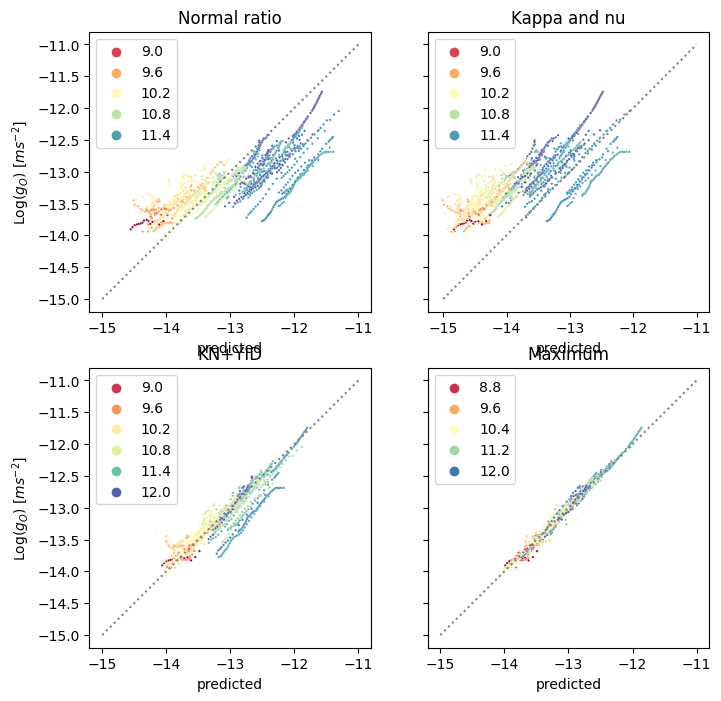

In [21]:
standard = plot_n_tune('standard')

standard/121_15


,filter,mean,std,count,mse,rmse
0,Everything,-0.265393,0.568516,2059,0.393487,0.627285
1,Quality data,-0.265393,0.568516,2059,0.393487,0.627285
2,Quality simulation,-0.231045,0.559328,1459,0.366016,0.604992



Kappa and nu


,filter,mean,std,count,mse,rmse
0,Everything,0.420080,0.418415,2059,0.351453,0.592835
1,Quality data,0.420080,0.418415,2059,0.351453,0.592835
2,Quality simulation,0.432254,0.409317,1459,0.354269,0.595205


kappa    3.337283e+06
nu       6.924235e-01
dtype: float64



KN+YID


,filter,mean,std,count,mse,rmse
0,Everything,-0.064091,0.206008,2059,0.046526,0.215700
1,Quality data,-0.064091,0.206008,2059,0.046526,0.215700
2,Quality simulation,-0.045679,0.172371,1459,0.031778,0.178263


kappa    445.626304
nu         0.264870
dtype: float64


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)





Maximum


,filter,mean,std,count,mse,rmse
0,Everything,-0.006960,0.142556,2059,0.020361,0.142691
1,Quality data,-0.006960,0.142556,2059,0.020361,0.142691
2,Quality simulation,0.000807,0.050977,1459,0.002598,0.050966


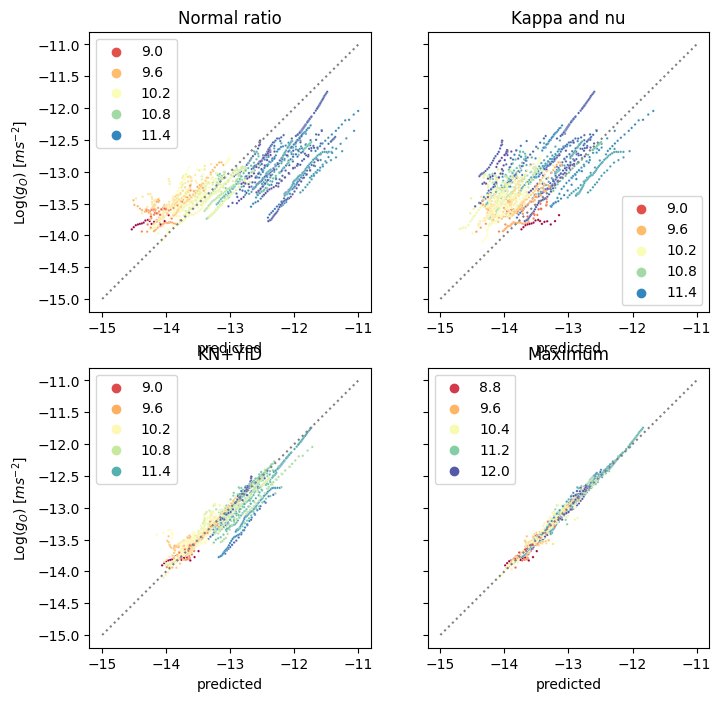

In [7]:
standard = plot_n_tune('standard')

standard/121_15


,filter,mean,std,count,mse,rmse
0,Everything,-0.265393,0.568516,2059,0.393487,0.627285
1,Quality data,-0.265393,0.568516,2059,0.393487,0.627285
2,Quality simulation,-0.231045,0.559328,1459,0.366016,0.604992



Kappa and nu


,filter,mean,std,count,mse,rmse
0,Everything,0.420080,0.418415,2059,0.351453,0.592835
1,Quality data,0.420080,0.418415,2059,0.351453,0.592835
2,Quality simulation,0.432254,0.409317,1459,0.354269,0.595205


kappa    3.337283e+06
nu       6.924235e-01
dtype: float64



KN+YID


,filter,mean,std,count,mse,rmse
0,Everything,-0.017782,0.154116,2059,0.024057,0.155102
1,Quality data,-0.017782,0.154116,2059,0.024057,0.155102
2,Quality simulation,-0.004486,0.089109,1459,0.007955,0.089192


kappa    89.298802
nu        0.216810
dtype: float64


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)





Maximum


,filter,mean,std,count,mse,rmse
0,Everything,-0.006960,0.142556,2059,0.020361,0.142691
1,Quality data,-0.006960,0.142556,2059,0.020361,0.142691
2,Quality simulation,0.000807,0.050977,1459,0.002598,0.050966


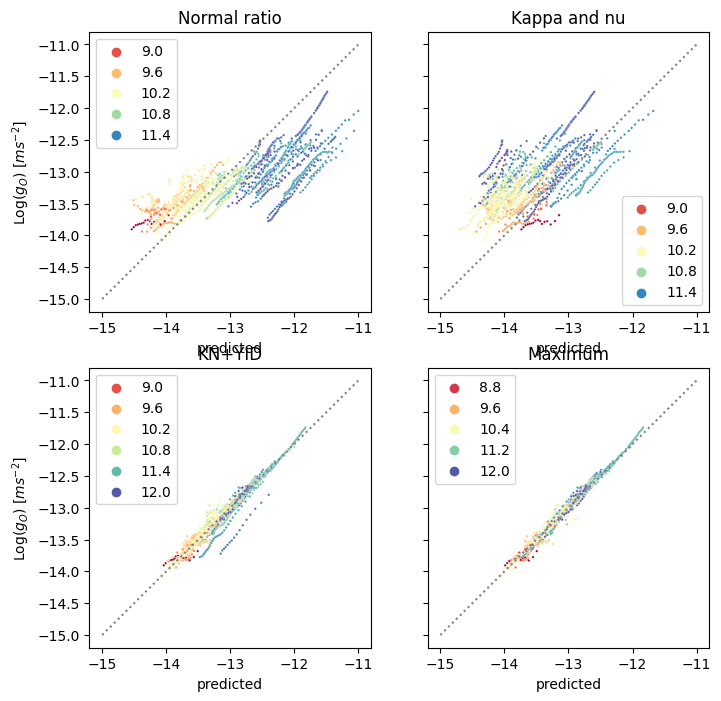

In [4]:
standard = plot_n_tune('standard')

vector/201_19


,filter,mean,std,count,mse,rmse
0,Everything,-0.075436,0.374325,2059,0.145742,0.381761
1,Quality data,-0.075436,0.374325,2059,0.145742,0.381761
2,Quality simulation,-0.070206,0.378778,1459,0.148303,0.385102



Kappa and nu


,filter,mean,std,count,mse,rmse
0,Everything,0.174888,0.237736,2059,0.087077,0.295087
1,Quality data,0.174888,0.237736,2059,0.087077,0.295087
2,Quality simulation,0.171764,0.223207,1459,0.079290,0.281585


kappa    23843.760270
nu           0.437252
dtype: float64



KN+YID


,filter,mean,std,count,mse,rmse
0,Everything,0.000725,0.150084,2059,0.022515,0.150050
1,Quality data,0.000725,0.150084,2059,0.022515,0.150050
2,Quality simulation,-0.000980,0.096480,1459,0.009303,0.096451


kappa    526.372763
nu         0.264328
dtype: float64


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)





Maximum


,filter,mean,std,count,mse,rmse
0,Everything,0.007568,0.141861,2059,0.020172,0.142028
1,Quality data,0.007568,0.141861,2059,0.020172,0.142028
2,Quality simulation,0.001128,0.049397,1459,0.002440,0.049393


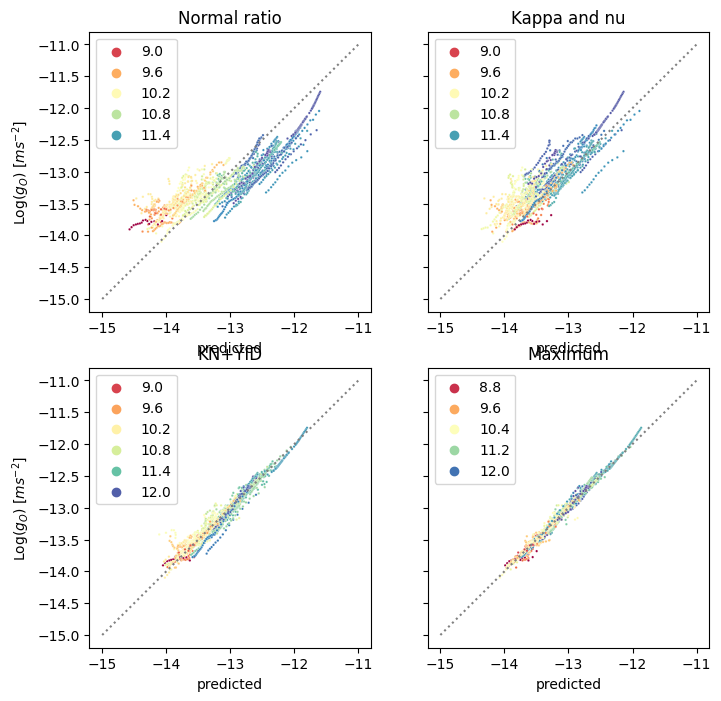

In [5]:
vector = plot_n_tune('vector')

vector/121_15


,filter,mean,std,count,mse,rmse
0,Everything,-0.035959,0.358090,2059,0.129460,0.359805
1,Quality data,-0.035959,0.358090,2059,0.129460,0.359805
2,Quality simulation,-0.037814,0.354851,1459,0.127263,0.356739



Kappa and nu


,filter,mean,std,count,mse,rmse
0,Everything,0.152328,0.237374,2059,0.079523,0.281998
1,Quality data,0.152328,0.237374,2059,0.079523,0.281998
2,Quality simulation,0.143891,0.202363,1459,0.061627,0.248248


kappa    1849.905403
nu          0.329361
dtype: float64



KN+YID


,filter,mean,std,count,mse,rmse
0,Everything,0.006920,0.160462,2059,0.025783,0.160572
1,Quality data,0.006920,0.160462,2059,0.025783,0.160572
2,Quality simulation,0.002284,0.088584,1459,0.007847,0.088584


kappa    539.082192
nu         0.266671
dtype: float64


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Maximum


,filter,mean,std,count,mse,rmse
0,Everything,0.007906,0.152986,2059,0.023456,0.153153
1,Quality data,0.007906,0.152986,2059,0.023456,0.153153
2,Quality simulation,0.001053,0.049908,1459,0.002490,0.049902


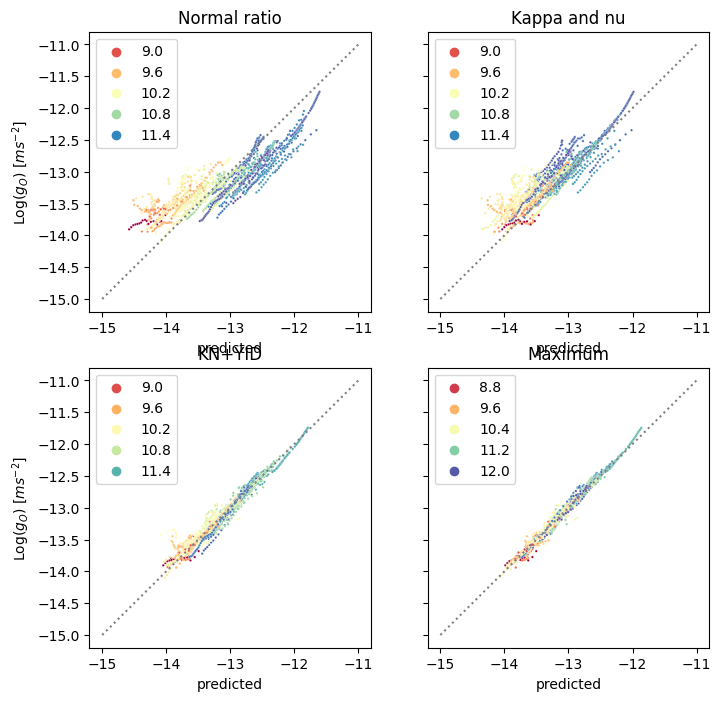

In [8]:
vector = plot_n_tune('vector')

vector/121_15


,filter,mean,std,count,mse,rmse
0,Everything,-0.035959,0.358090,2059,0.129460,0.359805
1,Quality data,-0.035959,0.358090,2059,0.129460,0.359805
2,Quality simulation,-0.037814,0.354851,1459,0.127263,0.356739



Kappa and nu


,filter,mean,std,count,mse,rmse
0,Everything,0.152328,0.237374,2059,0.079523,0.281998
1,Quality data,0.152328,0.237374,2059,0.079523,0.281998
2,Quality simulation,0.143891,0.202363,1459,0.061627,0.248248


kappa    1849.905403
nu          0.329361
dtype: float64



KN+YID


,filter,mean,std,count,mse,rmse
0,Everything,-0.003497,0.156925,2059,0.024626,0.156926
1,Quality data,-0.003497,0.156925,2059,0.024626,0.156926
2,Quality simulation,-0.008105,0.074511,1459,0.005614,0.074926


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Maximum


,filter,mean,std,count,mse,rmse
0,Everything,0.007906,0.152986,2059,0.023456,0.153153
1,Quality data,0.007906,0.152986,2059,0.023456,0.153153
2,Quality simulation,0.001053,0.049908,1459,0.002490,0.049902


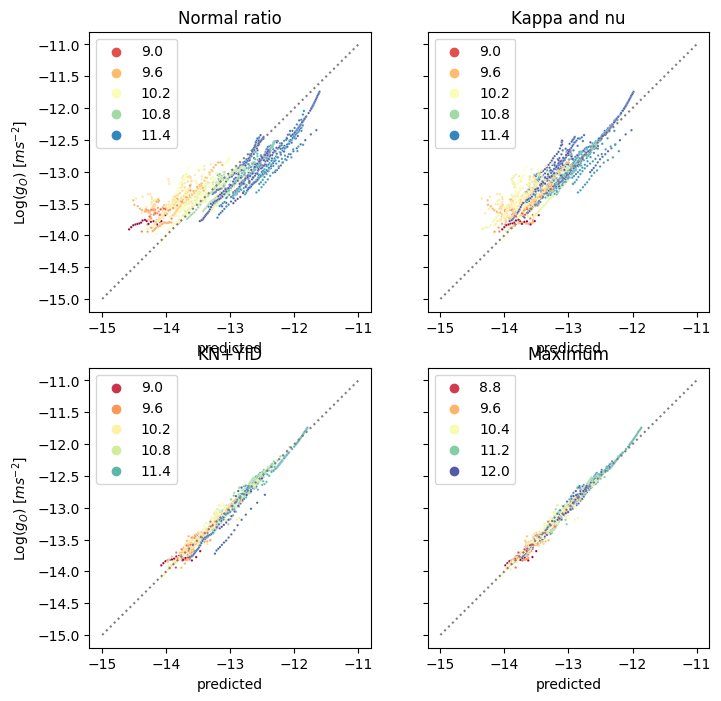

In [7]:
vector = plot_n_tune('vector')

baseline/121_15


,filter,mean,std,count,mse,rmse
0,Everything,0.230511,0.341451,2096,1,1.0
1,Quality data,0.230511,0.341451,2096,1,1.0
2,Quality simulation,0.289028,0.300055,1482,1,1.0



Kappa and nu


,filter,mean,std,count,mse,rmse
0,Everything,-0.052798,0.253806,2096,1,1.0
1,Quality data,-0.052798,0.253806,2096,1,1.0
2,Quality simulation,0.001272,0.197139,1482,1,1.0


kappa    1600.604134
nu          0.278496
dtype: float64



KN+YID


,filter,mean,std,count,mse,rmse
0,Everything,-0.038534,0.193906,2096,1,1.0
1,Quality data,-0.038534,0.193906,2096,1,1.0
2,Quality simulation,0.006173,0.116780,1482,1,1.0


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Maximum


,filter,mean,std,count,mse,rmse
0,Everything,-0.041833,0.188777,2096,1,1.0
1,Quality data,-0.041833,0.188777,2096,1,1.0
2,Quality simulation,0.003371,0.104613,1482,1,1.0


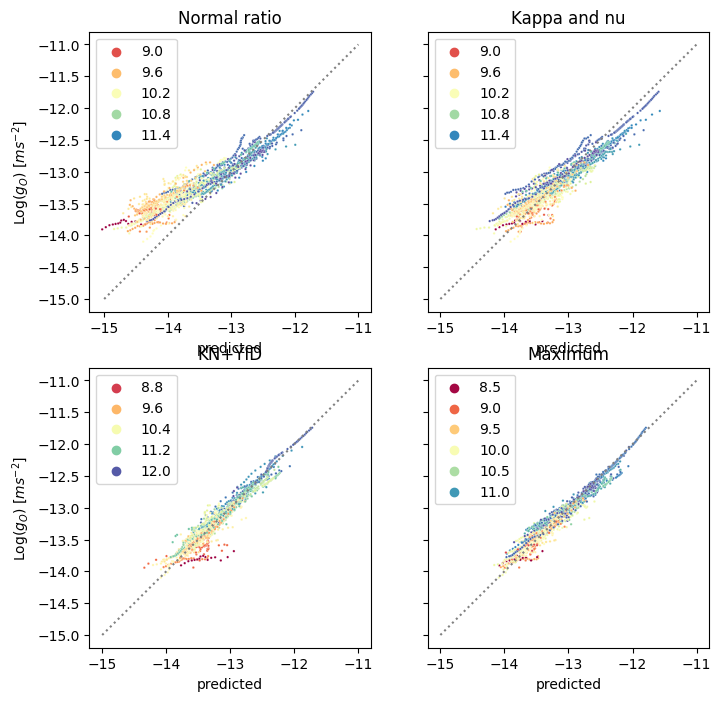

In [14]:
baseline = plot_n_tune('baseline')